## 문제 출처: https://github.com/DA4BAM/dataset

# Mobile 고객 이탈 분석

* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 의뢰하였습니다.
* 고객 이탈여부(CHURN)에 영향을 주는 요인을 찾아 봅시다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action='ignore')

### 2) 데이터 로딩

In [2]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	Label	|


----

## 1.가설수립

* 각 변수는 고객 이탈과 관련이 있을 것이다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) COLLEGE

1. 변수의 비즈니스 의미: 고객의 대학졸업 여부(1, 0)

2. 범주형 데이터

3. 전처리 사항:
    * Null 값 없음  
    * 가변수화 1, 0으로 되어 있음  
    * 전처리 필요 없음

In [3]:
# 4. 기초 통계량
print(mobile['COLLEGE'].value_counts())
print('-'*50)
print(mobile['COLLEGE'].value_counts()/len(mobile['COLLEGE']))

1    9049
0    8951
Name: COLLEGE, dtype: int64
--------------------------------------------------
1    0.502722
0    0.497278
Name: COLLEGE, dtype: float64


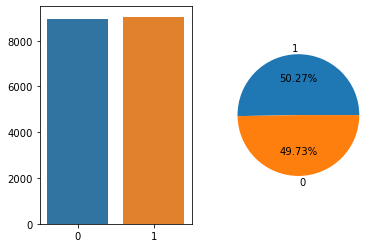

In [4]:
# 5. 분포
cnt = mobile['COLLEGE'].value_counts()

plt.subplot(1,2,1)
sns.barplot(x = cnt.index, y = cnt.values)

plt.subplot(1,2,2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.show()

6. 위 정보로부터 파악한 내용(비즈니스!) 정리  
    - 대학을 졸업한 이들이 전체 고객의 약 50%를 차지합니다.  
    - 대학을 졸업하지 않은 이들은 전체 고객의 약 50%를 차지합니다.


7. 추가 분석 내용
    - 대학 졸업 여부만으로 고객의 이탈 여부를 확인할 수 없기 때문에 소득 및 월 초과사용 시간 및 월 사용 잔여시간 등과 연관하여 분석할 필요가 있습니다.


### 2) INCOME

1. 변수의 비즈니스 의미: 연 수입액(달러)
2. 숫자형 데이터
3. 전처리 사항:
    * Null 값 없음  
    * 숫자형으로 가변수화 필요 없음. 
    * 따라서 전처리 필요 없음.


count     18000.000000
mean      80314.400278
std       41703.420130
min       20007.000000
25%       42151.500000
50%       75501.500000
75%      116082.250000
max      159983.000000
Name: INCOME, dtype: float64


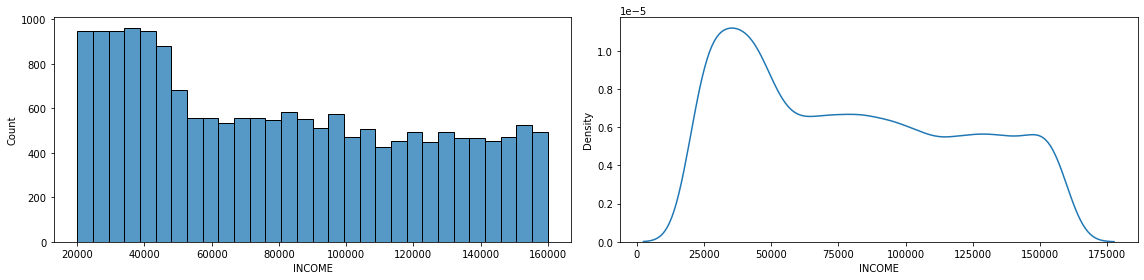

In [5]:
# 4. 기초 통계량
print(mobile['INCOME'].describe())

# 5. 분포
plt.figure(figsize  = (16,4))
plt.subplot(1,2,1)
sns.histplot(data = mobile, x= 'INCOME', bins = 30)

plt.subplot(1,2,2)
sns.kdeplot(data = mobile, x = 'INCOME')

plt.tight_layout()
plt.show()

6. 위 정보로부터 파악한 내용(비즈니스!) 정리  
    - 소득의 중앙값은 약 75000달러입니다.
    - 전체 소득 분포에서 2만달러에서 5만달러 사이의 고객이 많음을 알 수 있습니다.
7. 추가 분석 내용
    - 휴대폰 요금은 한달 단위로 지불하기 때문에 이들의 월 소득을 파악할 필요가 있습니다.


### 3) HANDSET_PRICE

1. 변수의 비즈니스 의미: 핸드폰 가격(달러)
2. 숫자형 데이터
3. 전처리 사항:
    * Null 값 없음  
    * 숫자형으로 가변수화 필요 없음. 
    * 따라서 전처리 필요 없음


count    18000.000000
mean       390.096667
std        214.239639
min        130.000000
25%        219.000000
50%        326.000000
75%        536.000000
max        899.000000
Name: HANDSET_PRICE, dtype: float64


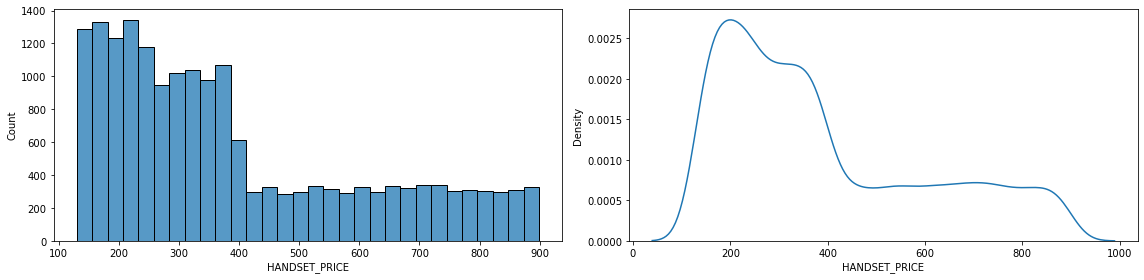

In [6]:
# 4. 기초 통계량
print(mobile['HANDSET_PRICE'].describe())

# 5. 분포
plt.figure(figsize  = (16,4))
plt.subplot(1,2,1)
sns.histplot(data = mobile, x= 'HANDSET_PRICE', bins = 30)

plt.subplot(1,2,2)
sns.kdeplot(data = mobile, x = 'HANDSET_PRICE')

plt.tight_layout()
plt.show()


6. 위 정보로부터 파악한 내용(비즈니스!) 정리  
    - 휴대폰 가격의 최저는 130달러, 최고는 약 900달러입니다.  
    - 휴대폰 시장에서 중앙값 가격은 약 330달러로 알 수 있습니다.  
    - 휴대폰 가격은 주로 150달러에서 400달러 밑으로 많이 형성되어 있습니다.
7. 추가 분석 내용
    - 휴대폰이 정가로 많이 팔리는지, 아니면 다양한 프로모션을 통해 좀 더 저렴한 가격에 팔리고 있는지 실제 시장에서 형성된 가격을 알 필요가 있습니다.


### 4) AVERAGE_CALL_DURATION

1. 변수의 비즈니스 의미: 평균 통화시간(분)
2. 숫자형 데이터
3. 전처리 사항:
    * Null 값 없음  
    * 숫자형으로 가변수화 필요 없음. 
    * 따라서 전처리 필요 없음

count    18000.000000
mean         5.990944
std          4.398894
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         15.000000
Name: AVERAGE_CALL_DURATION, dtype: float64


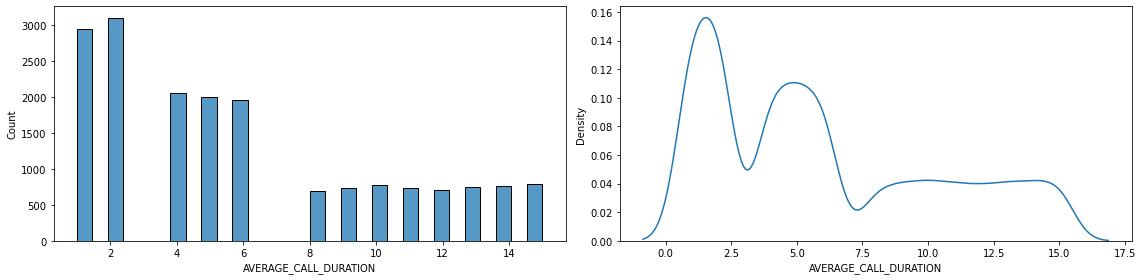

In [7]:
# 4. 기초 통계량
print(mobile['AVERAGE_CALL_DURATION'].describe())

# 5. 분포
plt.figure(figsize  = (16,4))
plt.subplot(1,2,1)
sns.histplot(data = mobile, x= 'AVERAGE_CALL_DURATION', bins = 30)

plt.subplot(1,2,2)
sns.kdeplot(data = mobile, x = 'AVERAGE_CALL_DURATION')

plt.tight_layout()
plt.show()

6. 위 정보로부터 파악한 내용(비즈니스!) 정리  
    - 평균 통화시간은 약 6분임을 알 수 있습니다.  
    - 고객중 약 3/4의 고객이 통화 시간이 10분 이하임을 알 수 있습니다.
7. 추가 분석 내용
    - 고객의 통화 사용의 주 목적이 무엇인지 파악할 필요가 있습니다. 최근 SNS 서비스가 발전하면서 전화보다는 메세지를 통해 연락하고 있기 때문에 통화는 대부분 특별한 상황(Ex. 급한 연락, 연락한지 오래된 지인 등)일 겁니다. 그 이외에 높은 통화시간을 보이는 이들은 영업 직군에서 일하고 있는 고객일 가능성이 높습니다.


### 5) REPORTED_SATISFACTION

1. 변수의 비즈니스 의미: 만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	
2. 범주형 데이터
3. 전처리 사항:
    * Null 값 존재  
    * 범주형으로 5개의 카테고리를 가변수화 할 필요가 있음.
    * 따라서 Null값 삭제와 가변수화 전처리 필요

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64
--------------------------------------------------
very_unsat    0.392889
very_sat      0.253444
unsat         0.199444
avg           0.100333
sat           0.051778
Name: REPORTED_SATISFACTION, dtype: float64


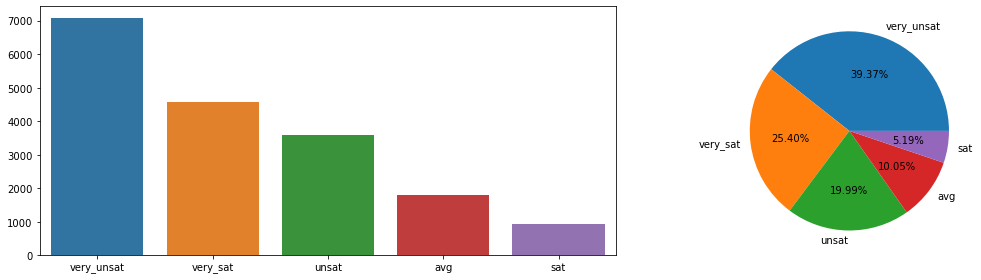

In [8]:
# 4. 기초 통계량
print(mobile['REPORTED_SATISFACTION'].value_counts())
print('-'*50)
print(mobile['REPORTED_SATISFACTION'].value_counts()/len(mobile['REPORTED_SATISFACTION']))

# 5. 분포
cnt = mobile['REPORTED_SATISFACTION'].value_counts()

plt.figure(figsize  = (16,4))
plt.subplot(1,2,1)
sns.barplot(x = cnt.index, y = cnt.values)

plt.subplot(1,2,2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')

plt.tight_layout()
plt.show()


6. 위 정보로부터 파악한 내용(비즈니스!) 정리  
    - 매우 불만족, 불만족이 전체 서비스 만족도의 약 60%를 차지합니다.  
    - 반면 만족, 매우만족이 전체 서비스 만족도의 약 30%만을 차지합니다.
7. 추가 분석 내용
    - 서비스 만족에 대해 평균이라고 대답한 이들 역시 조금의 불만이라도 가지게 된다면 이탈 고객이 될 위험이 있습니다. 이러면 전체 고객 중 70%가 이탈 위험이 있기 때문에 어떤 서비스가 구체적으로 불만족스러운지 확인할 필요가 있습니다.


### 6) CONSIDERING_CHANGE_OF_PLAN

1. 변수의 비즈니스 의미: 변경 계획 설문('never_thought', 'no', 'perhaps', 'considering', 'actively_looking_into_it')
2. 범주형 데이터
3. 전처리 사항:
    * Null 값 없음  
    * 범주형으로 가변수화 필요. 


considering                 7141
actively_looking_into_it    4453
no                          3644
never_thought               1804
perhaps                      958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
--------------------------------------------------
considering                 0.396722
actively_looking_into_it    0.247389
no                          0.202444
never_thought               0.100222
perhaps                     0.053222
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: float64


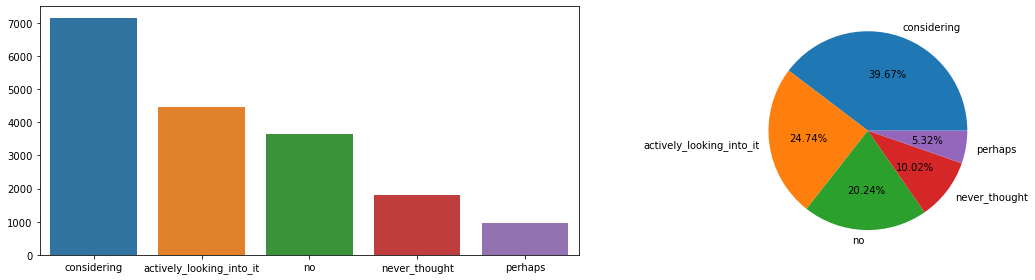

In [9]:
# 4. 기초 통계량
print(mobile['CONSIDERING_CHANGE_OF_PLAN'].value_counts())
print('-'*50)
print(mobile['CONSIDERING_CHANGE_OF_PLAN'].value_counts()/len(mobile['CONSIDERING_CHANGE_OF_PLAN']))

# 5. 분포
cnt = mobile['CONSIDERING_CHANGE_OF_PLAN'].value_counts()

plt.figure(figsize  = (16,4))
plt.subplot(1,2,1)
sns.barplot(x = cnt.index, y = cnt.values)

plt.subplot(1,2,2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.tight_layout()
plt.show()


6. 위 정보로부터 파악한 내용(비즈니스!) 정리  
    - 통신사를 옮기는 걸 아마도, 고려중, 활발히 찾는 이들이 전체 고객의 약 70%입니다.  
    - 통신사 이동을 고려하지 않는 이들은 전체 고객의 약 30% 입니다.
7. 추가 분석 내용
    - 통신사의 이탈 여부에는 많은 요소가 있겠지만 현재 경쟁사의 서비스 프로모션이 진행되고 있는지도 알 필요가 있습니다. 만약 그렇다면 우리도 그에 맞는 프로모션으로 대응해 고객 이탈을 막야아 합니다.


### 7) CHURN(target)

1. 변수의 비즈니스 의미: 이탈여부(1 : 이탈, 0 : 잔류)
2. 범주형 데이터
3. 전처리 사항:
    * Null 값 없음  
    * 범주형이지만 가변수화 되어 있음
    * 따라서 전처리 필요 없음


0    9131
1    8869
Name: CHURN, dtype: int64
--------------------------------------------------
0    0.507278
1    0.492722
Name: CHURN, dtype: float64


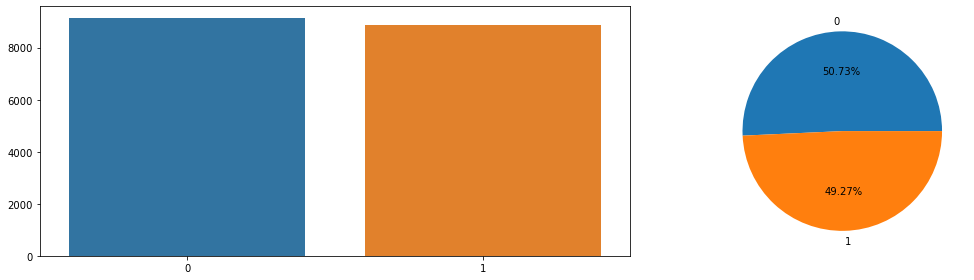

In [10]:
# 4. 기초 통계량
print(mobile['CHURN'].value_counts())
print('-'*50)
print(mobile['CHURN'].value_counts()/len(mobile['CHURN']))

# 5. 분포
cnt = mobile['CHURN'].value_counts()
plt.figure(figsize  = (16,4))
plt.subplot(1,2,1)
sns.barplot(x = cnt.index, y = cnt.values)

plt.subplot(1,2,2)
plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%')
plt.tight_layout()
plt.show()


6. 위 정보로부터 파악한 내용(비즈니스!) 정리  
    - 전체 고객중 약 50%가 이탈 했습니다.  
7. 추가 분석 내용
    - 이제 지금까지 수집한 다양한 변수들과 이탈과의 관계를 파악해야 합니다. 현재 고객 이탈은 약 50%로 매우 높은 수준입니다.
 

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [11]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) COLLEGE --> CHURN

교차표
 CHURN           0         1
COLLEGE                    
0        0.515697  0.484303
1        0.498950  0.501050
----------------------------------------------------------------------------------------------------


<Figure size 1152x288 with 0 Axes>

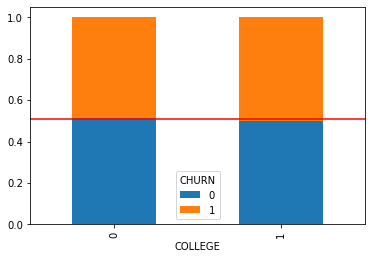

In [12]:
feature = 'COLLEGE'

# 교차표 생성
table = pd.crosstab(mobile[feature], mobile[target], normalize = 'index')

# 1. 교차표 출력
print('교차표\n', table)
print('-' * 100)

# 2. 시각화(
plt.figure(figsize = (16, 4))
table.plot.bar(stacked=True)
plt.axhline(1 - mobile[target].mean(), color = 'r')
plt.show()

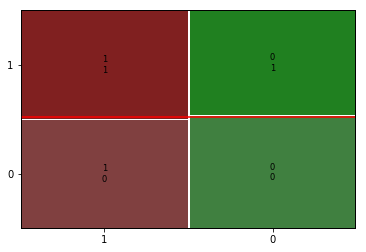

In [13]:
mosaic(mobile, [feature, target])
plt.axhline(1 - mobile[target].mean(), color = 'r')
plt.show()

In [14]:
# 3. 가설검정(카이제곱검정)
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 0.0
p-value 1.0
기대빈도
 [[0.50732337 0.49267663]
 [0.50732337 0.49267663]]


4. 시각화 및 수치화를 통한 파악 내용
    - 먼저 시각화를 통해 해당 변수들 간에는 관계가 없음을 확인했습니다.
    - 또한 카이제곱 가설 검정을 통해 p-value가 0.05보다 높기에 우리의 대립가설 '대학 졸업 여부는 고객의 이탈여부와 관련이 있을 것이다.'는 기각 되었습니다.
    - 비즈니스적으로 본다면 고객의 서비스 이탈 여부는 대학의 졸업 유무와는 관련이 없습니다.

#### 2) REPORTED_SATISFACTION --> CHURN

In [15]:
feature = 'REPORTED_SATISFACTION'
mobile

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1
...,...,...,...,...,...,...,...,...,...,...
17995,0,31079,200,40,NaN,181,11,unsat,actively_looking_into_it,0
17996,0,137194,63,0,NaN,787,11,very_unsat,no,1
17997,0,82931,0,77,NaN,232,2,very_unsat,never_thought,0
17998,0,124391,0,19,NaN,862,2,unsat,no,0


교차표
 CHURN                0         1
Satisfaction                    
0             0.504251  0.495749
1             0.514379  0.485621
----------------------------------------------------------------------------------------------------


<Figure size 1152x288 with 0 Axes>

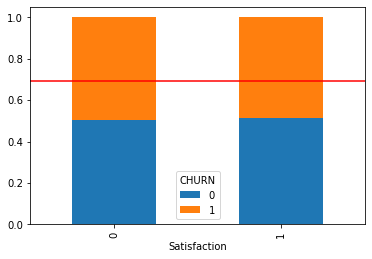

In [16]:
# 가변수화
temp = mobile.loc[mobile[feature].notnull()]

temp['Satisfaction'] = 0
temp.loc[temp[feature] == 'very_sat', 'Satisfaction'] = 1
temp.loc[temp[feature] == 'sat', 'Satisfaction'] = 1
temp.loc[temp[feature] == 'avg', 'Satisfaction'] = 0
temp.loc[temp[feature] == 'unsat', 'Satisfaction'] = 0
temp.loc[temp[feature] == 'very_unsat', 'Satisfaction'] = 0

feature = 'Satisfaction'

# 교차표 생성
table = pd.crosstab(temp[feature], temp[target], normalize = 'index')

# 1. 교차표 출력
print('교차표\n', table)
print('-' * 100)

# 2. 시각화(
plt.figure(figsize = (16, 4))
table.plot.bar(stacked=True)
plt.axhline(1 - temp[feature].mean(), color = 'r')
plt.show()

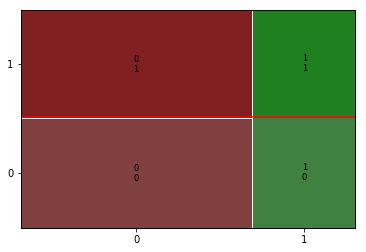

In [17]:
mosaic(temp, [feature, target])
plt.axhline(1 - temp[target].mean(), color = 'r')
plt.show()

In [18]:
# 3. 가설검정(카이제곱검정)
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 0.0
p-value 1.0
기대빈도
 [[0.5093151 0.4906849]
 [0.5093151 0.4906849]]


4. 시각화 및 수치화를 통한 파악 내용
    - 가변화 후 시각화와 가설 검정 결과 놀랍게도 서비스와 이탈 사이에는 관련이 매우 적어 보입니다.
    - 이는 서비스 불만족과 이탈률의 연관이 적기 보다는 자사 통신 서비스를 써야만 하는 고객층이 있는 것으로 파악됩니다.
    - 또는 자사에 경각심을 가지게 하기 위해 소비자들이 설문 대답을 이렇게 작성할 가능성 역시 있습니다.  
    - 따라서 아무리 고객 이탈율과 서비스 만족도 사이의 관련성이 적어 보인다 해도 최종적으로 서비스의 만족도를 올려야 하기 때문에 이 부분을 완전히 무시할 순 없습니다.

#### 3) CONSIDERING_CHANGE_OF_PLAN --> CHURN

In [19]:
feature = 'CONSIDERING_CHANGE_OF_PLAN'

교차표
 CHURN               0         1
CONSIDERING                    
0            0.500312  0.499688
1            0.511126  0.488874
----------------------------------------------------------------------------------------------------


<Figure size 1152x288 with 0 Axes>

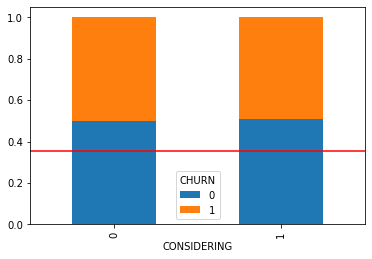

In [20]:
# 가변수화
temp = mobile.loc[mobile[feature].notnull()]

temp['CONSIDERING'] = 0
temp.loc[temp[feature] == 'actively_looking_into_it', 'CONSIDERING'] = 1
temp.loc[temp[feature] == 'considering', 'CONSIDERING'] = 1
temp.loc[temp[feature] == 'perhaps', 'CONSIDERING'] = 0
temp.loc[temp[feature] == 'no', 'CONSIDERING'] = 0
temp.loc[temp[feature] == 'never_thought', 'CONSIDERING'] = 0

feature = 'CONSIDERING'

# 교차표 생성
table = pd.crosstab(temp[feature], temp[target], normalize = 'index')

# 1. 교차표 출력
print('교차표\n', table)
print('-' * 100)

# 2. 시각화(
plt.figure(figsize = (16, 4))
table.plot.bar(stacked=True)
plt.axhline(1 - temp[feature].mean(), color = 'r')
plt.show()

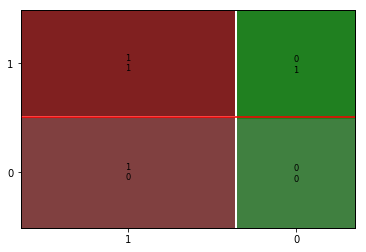

In [21]:
mosaic(temp, [feature, target])
plt.axhline(1 - temp[target].mean(), color = 'r')
plt.show()

In [22]:
# 3. 가설검정(카이제곱검정)
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

카이제곱통계량 0.0
p-value 1.0
기대빈도
 [[0.50571933 0.49428067]
 [0.50571933 0.49428067]]


4. 시각화 및 수치화를 통한 파악 내용
    - 시각화와 수치화를 통해 요금 변경 계획가 고객 이탈 사이의 관계는 거의 없어 보입니다.  
    - 이는 생각해보면 고객들은 경쟁사들과 자사의 서비스 및 프로모션을 비교해 합리적으로 통신 서비스를 선택하고 있다고 생각할 수 있습니다.
    - 따라서 해당 설문에서 변경 계획이 더 많다고 나온 것은 자사 서비스보다 경쟁력 있는 프로모션 서비스가 나온다면 이탈할 수 있다는 것을 의미합니다.
    -  이에 대응하기 위해 자사는 통신 서비스의 가격 책정 및 다양한 프로모션 혹은 서비스 퀄리티를 높이는 전략으로 고객확보에 힘써야 합니다.

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) INCOME --> CHURN


In [23]:
feature = 'INCOME'

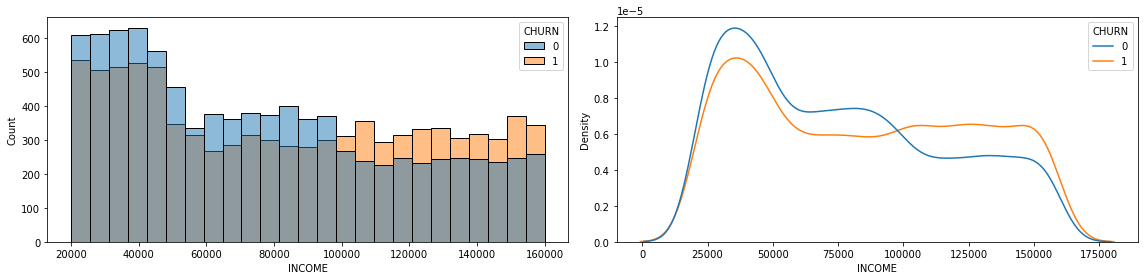

In [24]:
# 1. 시각화
plt.figure(figsize = (16, 4))

plt.subplot(1, 2, 1)
sns.histplot(x = feature, data = mobile, hue = target)

plt.subplot(1, 2, 2)
sns.kdeplot(x = feature, data = mobile, hue = target, common_norm = False)

plt.tight_layout()
plt.show()

In [25]:
# 2. 로지스틱 회귀
model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2
INCOME    0.000044
dtype: float64


3. 시각화 및 수치화를 통한 파악 내용 (비즈니스 관점 포함)
    - 시각화를 통해 소득이 높은 고객일수록 고객 이탈 비율이 높은 것을 알 수 있습니다.
    - 또한 p-value가 0.05보다 낮기 때문에 귀무가설이 기각됨.
    - 비즈니스 차원에서 이를 이해해보면 소득이 높은 고객일수록 자신의 지출을 컨트롤 하는 경향이 더 큽니다. 즉 이용하는 서비스의 경쟁력이 타사보다 낮거나 약하다면 바로 이탈하는 것으로 생각 할 수 있습니다.
    - 그러나 소득에 따른 이탈여부의 관계가 명확하게 설명되지 않기 때문에 소득 구간별로 해당 데이터를 볼 필요가 있습니다.  

#### 2) HANDSET_PRICE --> CHURN


In [26]:
feature = 'HANDSET_PRICE'

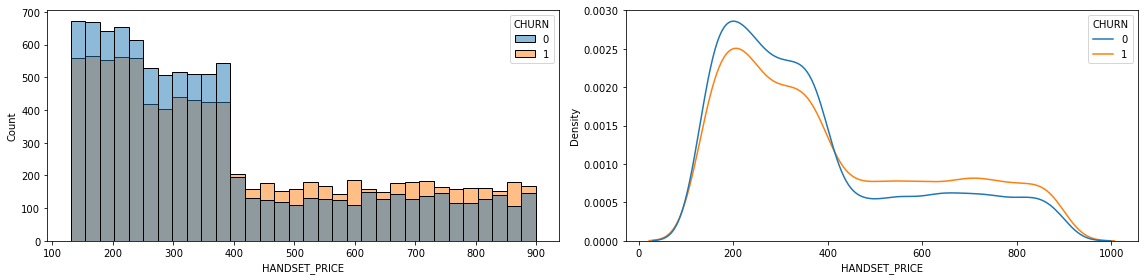

In [27]:
# 1. 시각화
plt.figure(figsize = (16, 4))

plt.subplot(1, 2, 1)
sns.histplot(x = feature, data = mobile, hue = target)

plt.subplot(1, 2, 2)
sns.kdeplot(x = feature, data = mobile, hue = target, common_norm = False)

plt.tight_layout()
plt.show()

In [28]:
# 2. 로지스틱 회귀
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692730
         Iterations 3
HANDSET_PRICE    0.000107
dtype: float64


3. 시각화 및 수치화를 통한 파악 내용
    - 핸드폰 가격이 저렴 할수록 이탈 고객의 수가 급감함을 알 수 있습니다.  
    - 하지만 핸드폰 가격이 400달러를 넘어가는 기종들에선 서비스 이탈자가 각 휴대폰 가격대에서 사용자보다 높습니다.  
    - 또한 p-value역시 0.05보다 낮아 우리의 가설이 맞음을 설명합니다.
    - 이를 통해 알 수 있는건 자사가 저렴한 휴대폰과 관련된 통신 상품에 경쟁력이 타사보다 높지만, 반대로 고가의 휴대폰과 관련된 통신 서비스의 경쟁력이 타사보다 낮음을 알 수 있습니다.  
    - 따라서 고가의 휴대폰을 사용하는 고객들의 서비스 이탈을 막기 위해 추가적인 프로모션이 필요할 것으로 보입니다.

#### 3) AVERAGE_CALL_DURATION --> CHURN


In [29]:
feature = 'AVERAGE_CALL_DURATION'

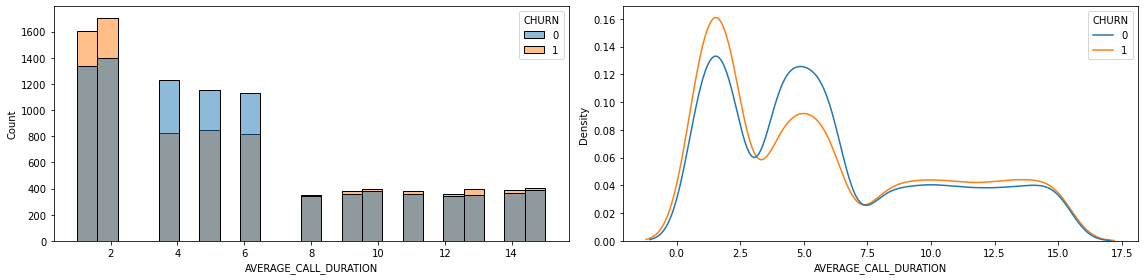

In [30]:
# 1. 시각화
plt.figure(figsize = (16, 4))

plt.subplot(1, 2, 1)
sns.histplot(x = feature, data = mobile, hue = target)

plt.subplot(1, 2, 2)
sns.kdeplot(x = feature, data = mobile, hue = target, common_norm = False)

plt.tight_layout()
plt.show()

In [31]:
# 2. 로지스틱 회귀
model = sm.Logit(temp[target], temp[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693027
         Iterations 3
AVERAGE_CALL_DURATION    0.03783
dtype: float64


3. 시각화 및 수치화를 통한 파악 내용
    - 평균 통화량이 높아질 수록 서비스 이탈자가 적어짐을 볼 수 있습니다.
    - p-value 역시 0.03으로 우리의 가설이 어느정도 맞음을 보여줍니다.
    - 이는 자사의 통화 서비스가 시간이 올라갈수록 타사보다 경쟁력이 있음을 의미합니다.
    - 반면 짧게 통화할 수록 이탈자의 비중이 높아지는 것으로 보아, 자사의 통화 서비스의 기본 요금이 타사보다 높음을 알 수 있습니다.  
    - 따라서 통화 서비스의 가격 책정을 다시 할 필요가 있습니다.

## 4.관계 정리

### 1) 강한관계의 변수

INCOME, HANDSET_PRICE

### 2) 약한관계의 변수

AVERAGE_CALL_DURATION

### 3) 관계 없음

REPORTED_SATISFACTION, COLLEGE, REPORTED_SATISFACTION

## 5.추가 분석

- 휴대폰이 시장에서 정가로 많이 팔리는지, 프로모션을 통해 할인된 가격으로 많이 팔리는지 실제 시장 가격을 추가로 조사해야 합니다.  
- 고객의 통화 사용의 주 목적이 무엇인지 파악할 필요가 있습니다.
- 전체 고객 중 70%가 이탈 위험이 있기 때문에 어떤 서비스가 구체적으로 불만족스러운지 조사할 필요가 있습니다.
-  통신사의 이탈 여부와 관련해 현재 경쟁사의 서비스 프로모션이 진행되고 있는지 조사할 필요가 있습니다.